In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [2]:
c_data = pd.read_csv('C:\SDS1\DoAn_DSS/heart_Disease_prediction_new_final.csv')
c_data.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   40    1   2       140   289    0        0      172    0.0      0.0      1   
1   49    0   3       160   180    0        0      156    0.0      1.0      2   
2   37    1   2       130   283    0        1       98    0.0      0.0      1   

   target  
0       0  
1       1  
2       0

In [3]:
df_filtered= c_data.replace('naN', np.nan)
df_filtered.dropna(inplace=True)
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.head(18)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    40    1   2       140   289    0        0      172    0.0      0.0   
1    49    0   3       160   180    0        0      156    0.0      1.0   
2    37    1   2       130   283    0        1       98    0.0      0.0   
3    48    0   4       138   214    0        0      108    1.0      1.5   
4    54    1   3       150   195    0        0      122    0.0      0.0   
5    39    1   3       120   339    0        0      170    0.0      0.0   
6    45    0   2       130   237    0        0      170    0.0      0.0   
7    54    1   2       110   208    0        0      142    0.0      0.0   
8    37    1   4       140   207    0        0      130    1.0      1.5   
9    48    0   2       120   284    0        0      120    0.0      0.0   
10   37    0   3       130   211    0        0      142    0.0      0.0   
11   58    1   2       136   164    0        1       99    1.0      2.0   
12   39    1   2       120   204    0        0      145    0.0      0.0   
13   49    1   4       140   234    0        0      140    1.0      1.0   
14   42    0   3       115   211    0        1      137    0.0      0.0   
15   54    0   2       120   273    0        0      150    0.0      1.5   
16   38    1   4       110   196    0        0      166    0.0      0.0   
17   43    0   2       120   201    0        0      165    0.0      0.0   

    slope  target  
0       1       0  
1       2       1  
2       1       0  
3       2       1  
4       1       0  
5       1       0  
6       1       0  
7       1       0  
8       2       1  
9       1       0  
10      1       0  
11      2       1  
12      1       0  
13      2       1  
14      1       0  
15      2       0  
16      2       1  
17      1       0

In [4]:
x = df_filtered.drop('target',axis=1)
y = df_filtered['target']

<AxesSubplot:xlabel='target', ylabel='count'>

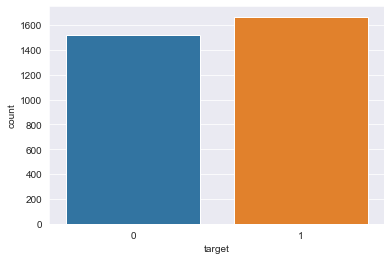

In [5]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.countplot(df_filtered['target'], label ='Count')

In [6]:
def corr_2_cols (Col1, Col2):
    res = df_filtered.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    plot = res.plot(kind='bar', stacked =True)
    return res, plot

(target     0     1      perc
 age                         
 28       1.0   NaN       NaN
 29       6.0   5.0  0.454545
 30       1.0   NaN       NaN
 31       1.0   2.0  0.666667
 32       3.0   2.0  0.400000
 33       1.0   1.0  0.500000
 34      11.0   8.0  0.421053
 35      20.0  20.0  0.500000
 36       5.0   3.0  0.375000
 37      17.0   8.0  0.320000
 38      11.0  28.0  0.717949
 39      26.0  15.0  0.365854
 40      20.0  16.0  0.444444
 41      47.0  48.0  0.505263
 42      40.0  35.0  0.466667
 43      42.0  41.0  0.493976
 44      50.0  48.0  0.489796
 45      39.0  30.0  0.434783
 46      38.0  42.0  0.525000
 47      25.0  35.0  0.583333
 48      44.0  45.0  0.505618
 49      30.0  30.0  0.500000
 50      36.0  41.0  0.532468
 51      61.0  61.0  0.500000
 52      60.0  74.0  0.552239
 53      43.0  47.0  0.522222
 54      85.0  89.0  0.511494
 55      50.0  55.0  0.523810
 56      55.0  74.0  0.573643
 57      79.0  76.0  0.490323
 58      87.0  94.0  0.519337
 59      7

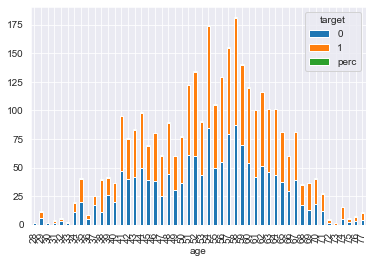

In [7]:
corr_2_cols('age','target')

(target     0     1      perc
 sex                         
 0        460   381  0.453032
 1       1060  1286  0.548167,
 <AxesSubplot:xlabel='sex'>)

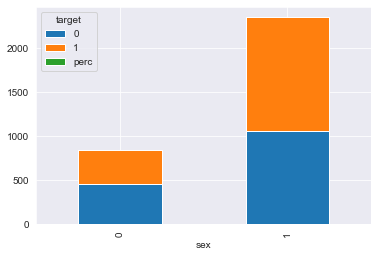

In [8]:
corr_2_cols('sex','target')

(target    0    1      perc
 cp                        
 0       104   39  0.272727
 1       451  193  0.299689
 2       314  247  0.440285
 3       394  346  0.467568
 4       257  842  0.766151,
 <AxesSubplot:xlabel='cp'>)

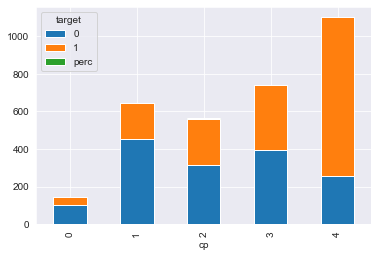

In [9]:
corr_2_cols('cp','target')

(target     0     1      perc
 fbs                         
 0       1303  1330  0.505127
 1        217   337  0.608303,
 <AxesSubplot:xlabel='fbs'>)

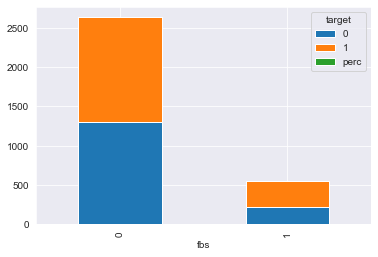

In [10]:
corr_2_cols('fbs','target')

(target     0    1      perc
 restecg                    
 0        901  787  0.466232
 1        331  551  0.624717
 2        288  329  0.533225,
 <AxesSubplot:xlabel='restecg'>)

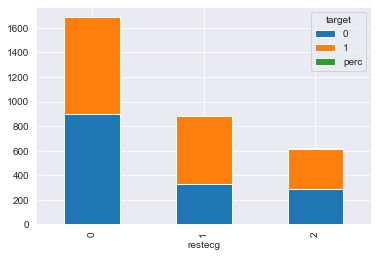

In [11]:
corr_2_cols('restecg','target')

(target     0    1      perc
 exang                      
 0.0     1032  937  0.475876
 1.0      488  730  0.599343,
 <AxesSubplot:xlabel='exang'>)

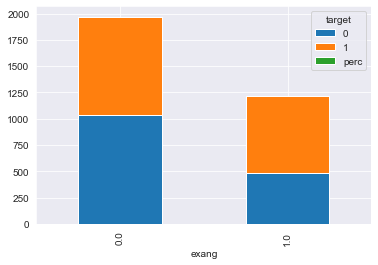

In [14]:
corr_2_cols('exang','target')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
#Khanh, Decision Tree (CART)
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

start_cart = time.time()
cart_pred = clf1.fit(X_train, y_train).predict(X_test)
end_cart = time.time()
print("Time decision tree (CART)",end_cart-start_cart)

Time decision tree (CART) 0.0146636962890625


In [33]:
#Khanh, Decision Tree (CART)
cart_score = metrics.accuracy_score(y_test, cart_pred)
#accuracies['CART'] = id3_score
print("Accuracy",cart_score)
print("Report",metrics.classification_report(y_test,cart_pred))

Accuracy 0.9174503657262278
Report               precision    recall  f1-score   support

           0       0.91      0.92      0.91       455
           1       0.93      0.91      0.92       502

    accuracy                           0.92       957
   macro avg       0.92      0.92      0.92       957
weighted avg       0.92      0.92      0.92       957



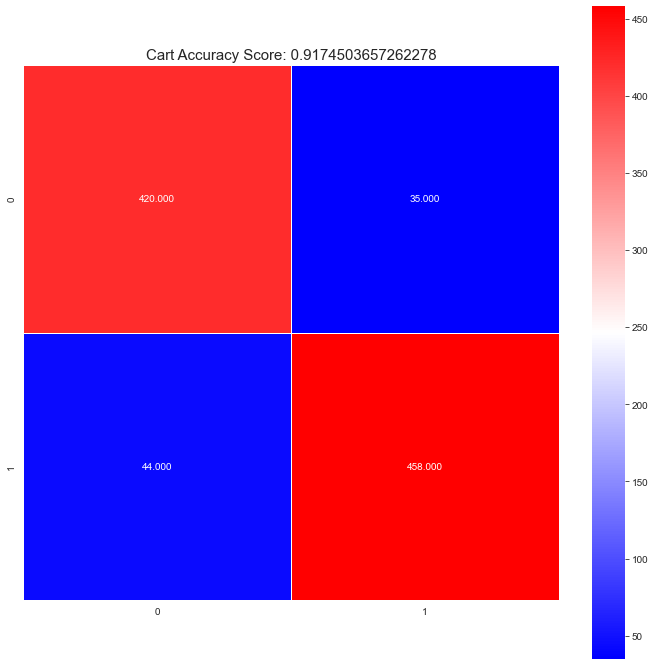

In [34]:
#Khanh, Decision Tree (CART)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='bwr')
str1 = "Actual label"
str2 = "Predicted label"
plt.ylabel=str1
plt.xlabel=str2
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

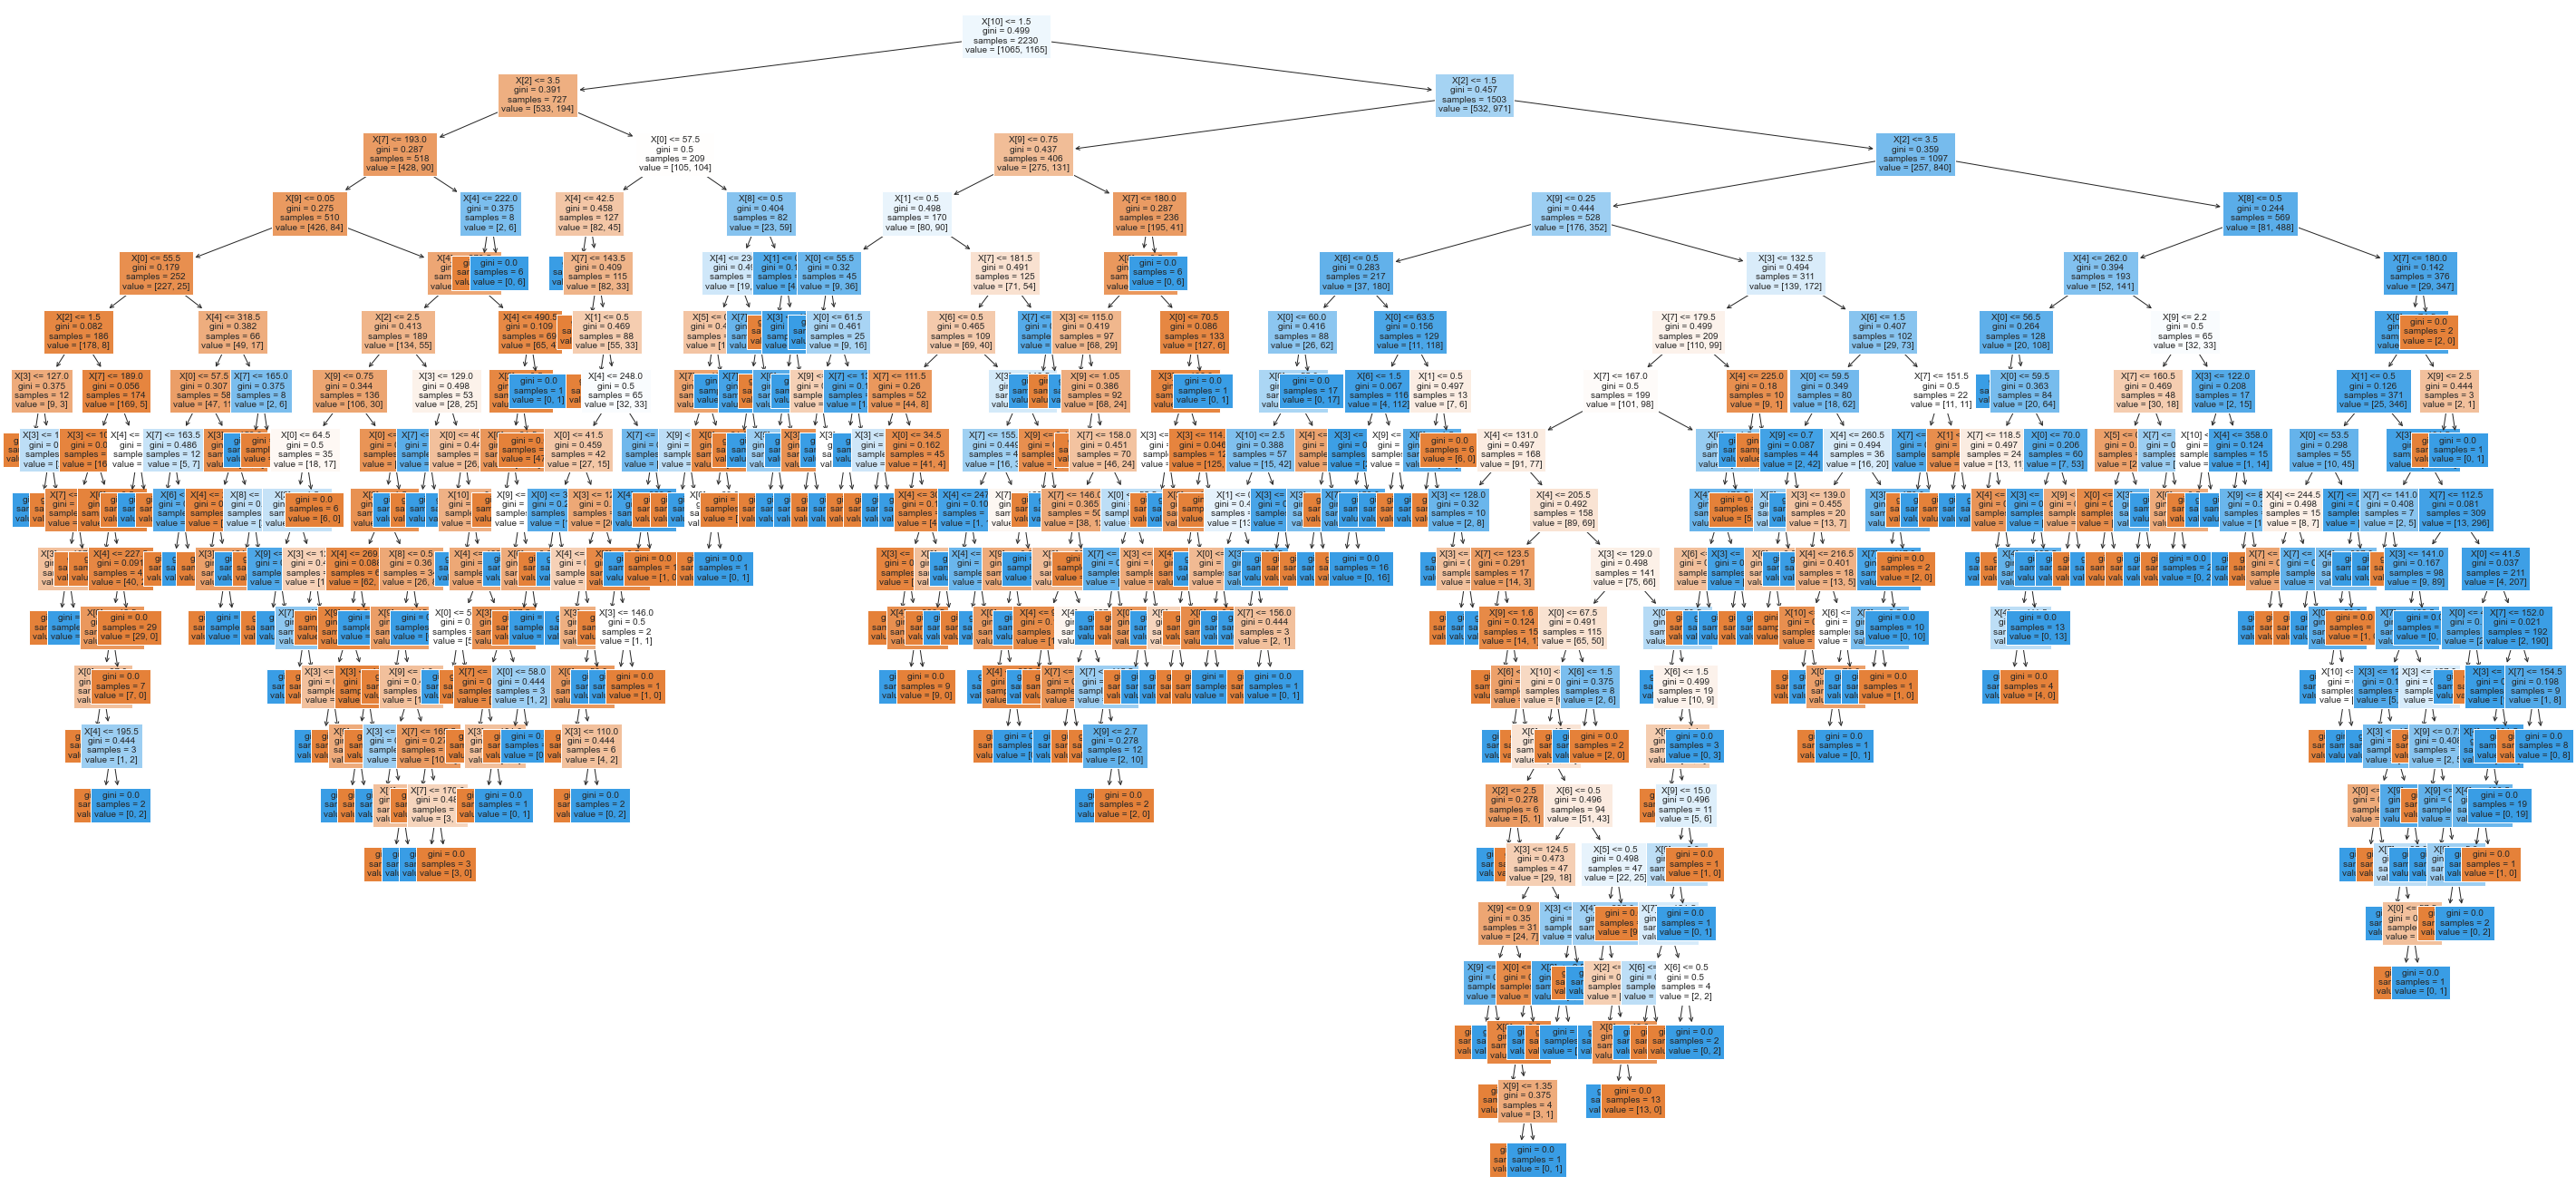

In [35]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

In [36]:
#Tan, Decision Tree (ID3)
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(X_train, y_train).predict(X_test)
end_tree = time.time()
#times['id3'] = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",end_tree-start_tree)

Time decision tree (ID3) 0.01210331916809082


In [37]:
#Tan, Decision Tree (ID3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
#accuracies['ID3'] = id3_score
print("Accuracy",id3_score)
print("Report",metrics.classification_report(y_test,id3_pred))

Accuracy 0.928944618599791
Report               precision    recall  f1-score   support

           0       0.92      0.93      0.93       455
           1       0.94      0.92      0.93       502

    accuracy                           0.93       957
   macro avg       0.93      0.93      0.93       957
weighted avg       0.93      0.93      0.93       957



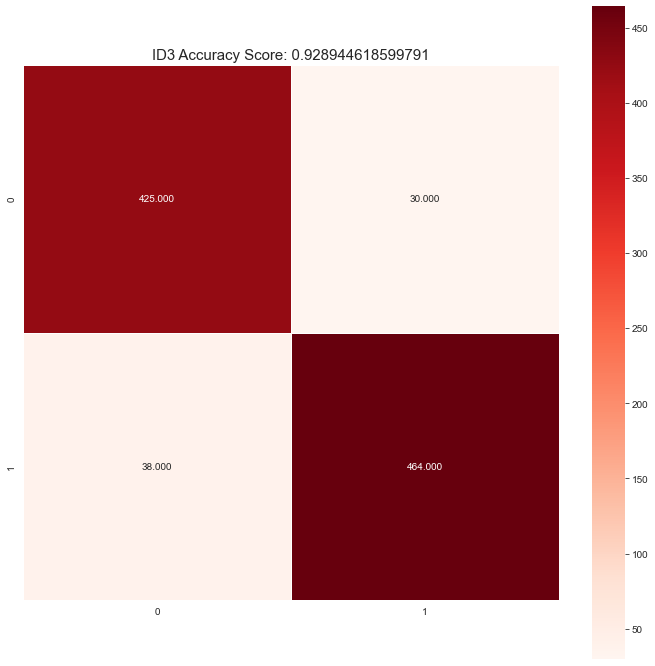

In [38]:
#Tan, Decision Tree (ID3)
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12,12))
sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
str1 = "Actual label"
str2 = "Predicted label"
plt.ylabel=str1
plt.xlabel=str2
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)
plt.show()

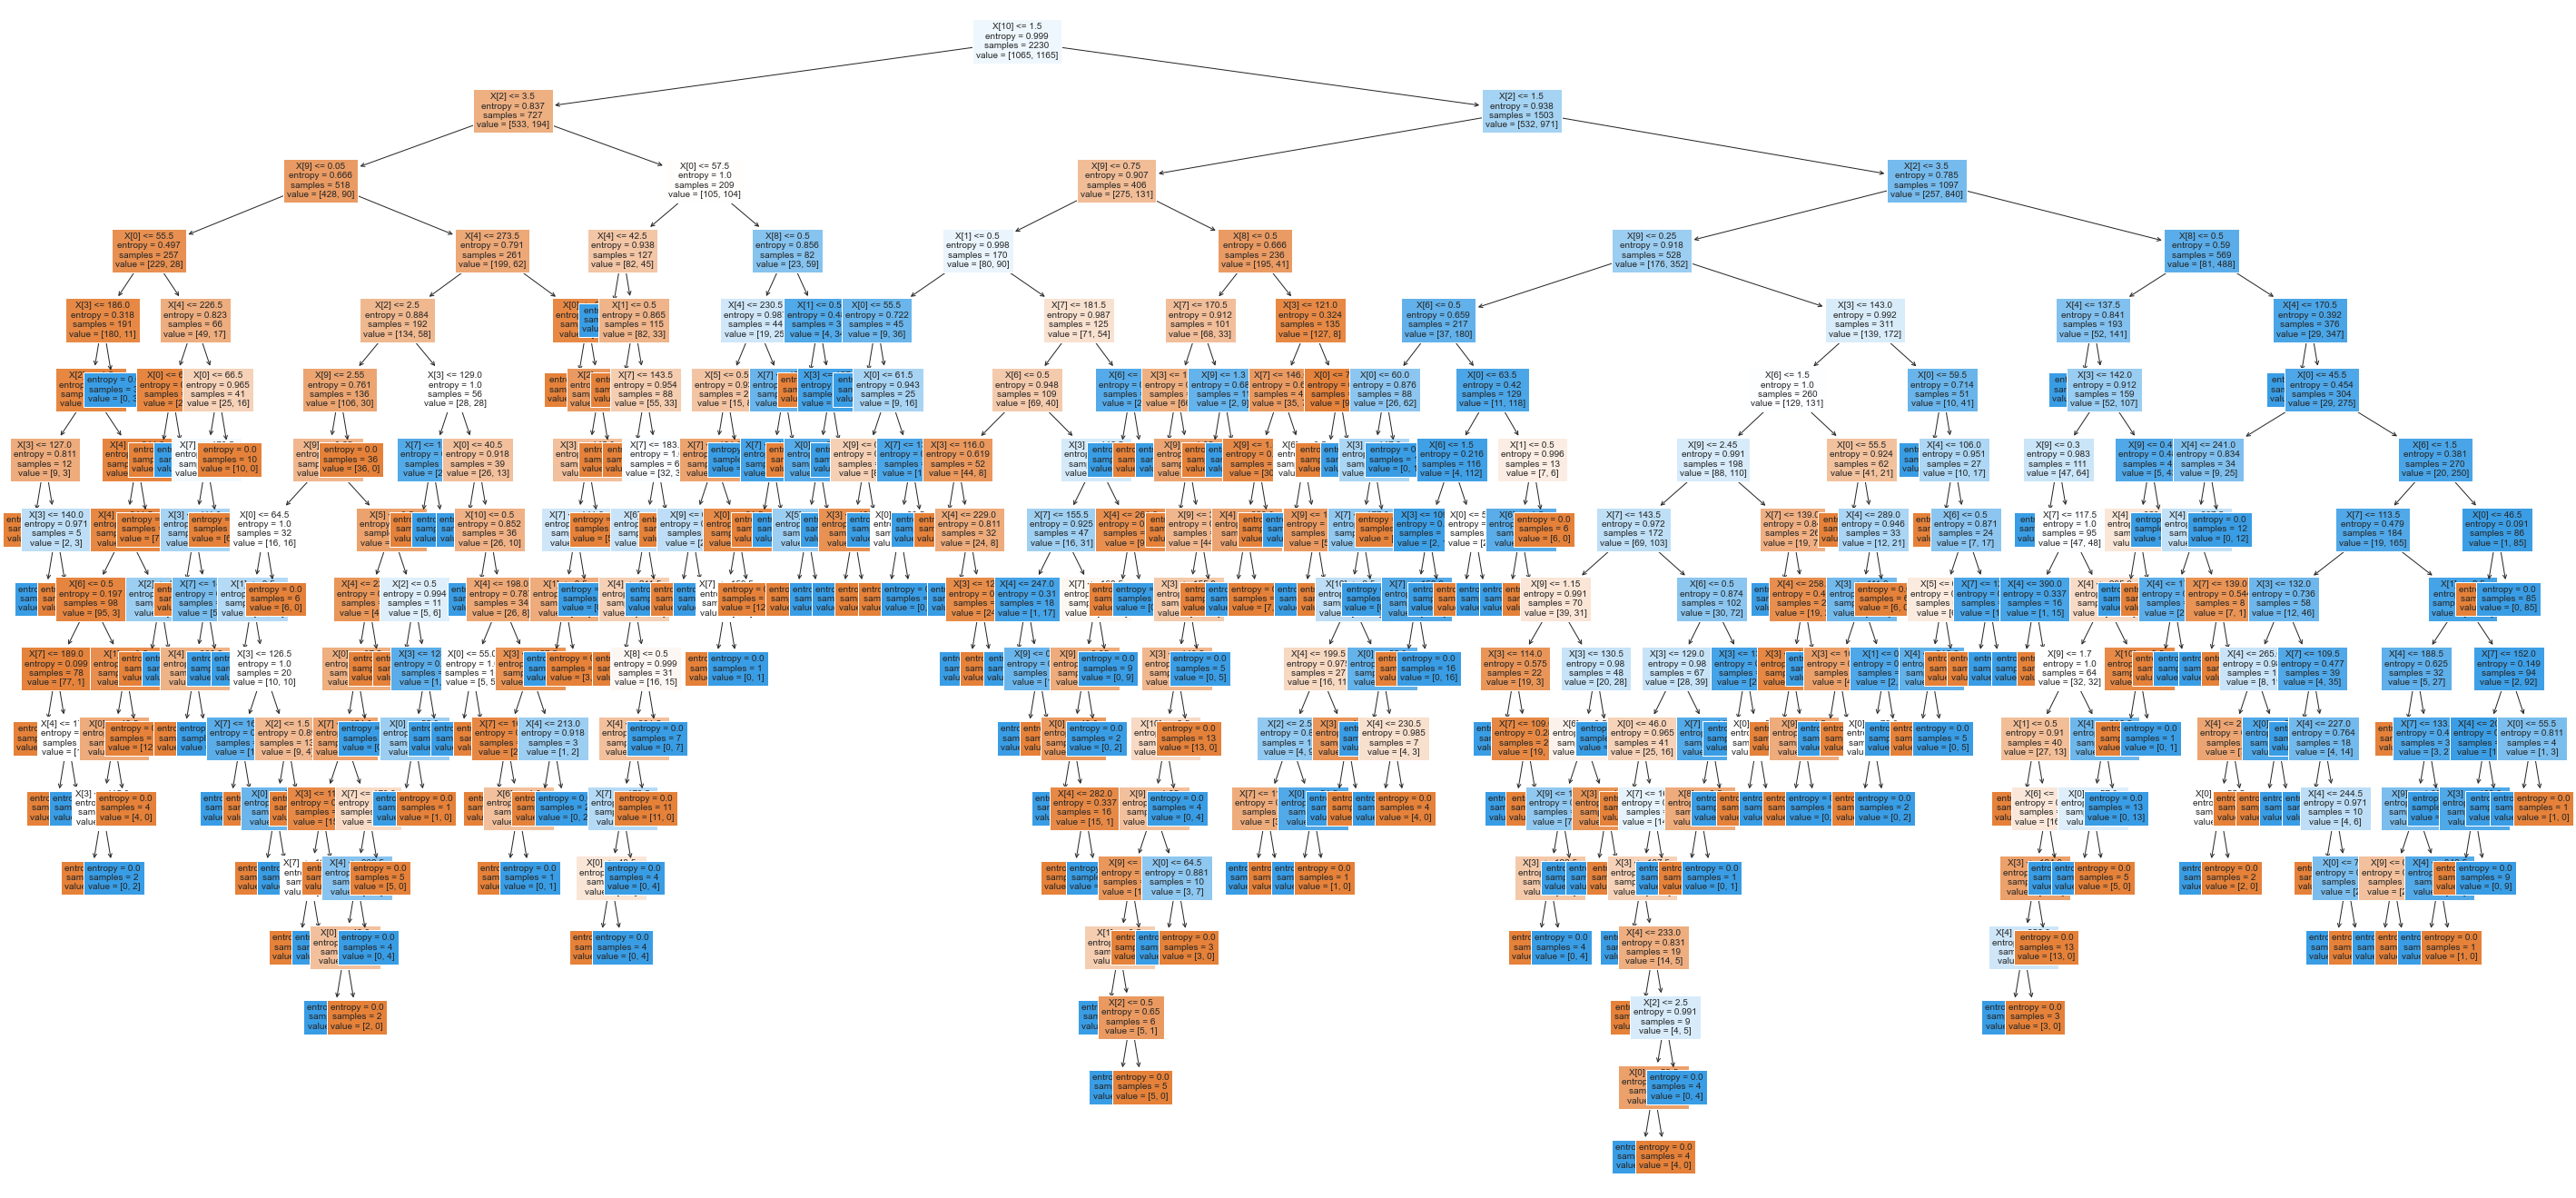

In [39]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [25]:
#Khanh làm KNearest
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,12):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(X_train, y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', end_knn - start_knn)
knn_score = max_knn_score
print("Accuracy", knn_score)
print("Report", metrics.classification_report(y_test, knn_pred))

Highest Accuracy Score : 91.74503657262278% with k = [1]
Time 0.5244865417480469
Accuracy 0.9174503657262278
Report               precision    recall  f1-score   support

           0       0.53      0.52      0.53       455
           1       0.57      0.59      0.58       502

    accuracy                           0.55       957
   macro avg       0.55      0.55      0.55       957
weighted avg       0.55      0.55      0.55       957



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.9174503657262278')

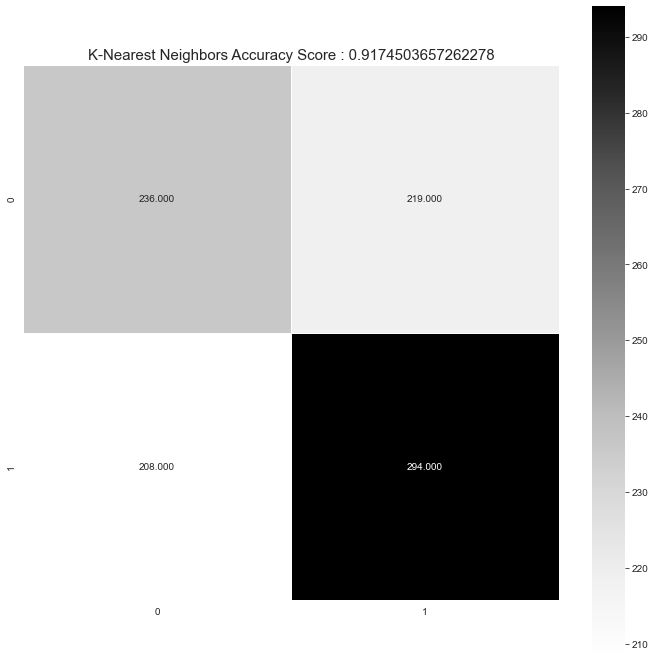

In [27]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(12,12))
sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greys')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =15)

In [28]:
#Khanh làm RandomForest
#accuracy cao nhất => chọn random forest
from sklearn.ensemble import RandomForestClassifier
import time
rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(X_train, y_train).predict(X_test)
end_rf= time.time()
print ("time", end_rf - start_rf)

rf_score = metrics.accuracy_score(y_test, rf_pred)
print("Accuracy", rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))


time 0.2934553623199463
Accuracy 0.9602925809822361
Report               precision    recall  f1-score   support

           0       0.96      0.96      0.96       455
           1       0.96      0.96      0.96       502

    accuracy                           0.96       957
   macro avg       0.96      0.96      0.96       957
weighted avg       0.96      0.96      0.96       957



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.9602925809822361')

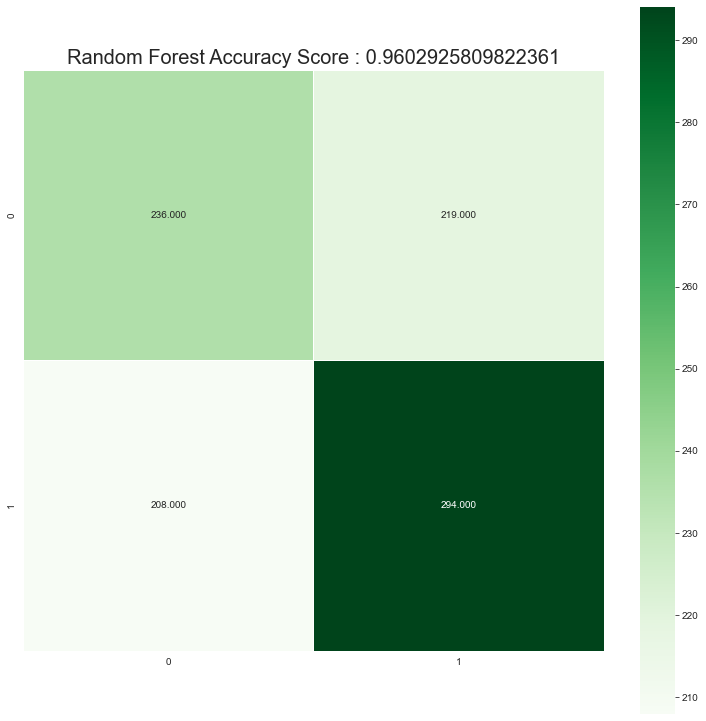

In [29]:
rf_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(13,13))
sns.heatmap(rf_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
plt.ylabel= "Actual Label"
plt.xlabel= "Prediceted Label"
title = 'Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =20)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
#Tân làm Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
start_lr = time.time()
lr_scores =  []

In [8]:
lr = LogisticRegression(max_iter=3300)
start_lr = time.time()
lr_pred = lr.fit(X_train, y_train).predict(X_test)
end_lr = time.time()
#times['lr']= timedelta(seconds = round(end_lr - start_lr,4)).total_second()
print("Time Logistic Regression (lr)",end_lr-start_lr)

Time Logistic Regression (lr) 0.32652759552001953


In [9]:
x = df_filtered.drop('target',axis=1)
y = df_filtered['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
lr_score = metrics.accuracy_score(y_test, lr_pred)
##accuracies['Logistic Regression'] = lr_score
print("Accuracy", lr_score)
print("Report", metrics.classification_report(y_test, lr_pred,labels=np.unique(lr_pred)))

Accuracy 0.7398119122257053
Report               precision    recall  f1-score   support

           0       0.73      0.73      0.73       455
           1       0.75      0.75      0.75       502

    accuracy                           0.74       957
   macro avg       0.74      0.74      0.74       957
weighted avg       0.74      0.74      0.74       957



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.7398119122257053')

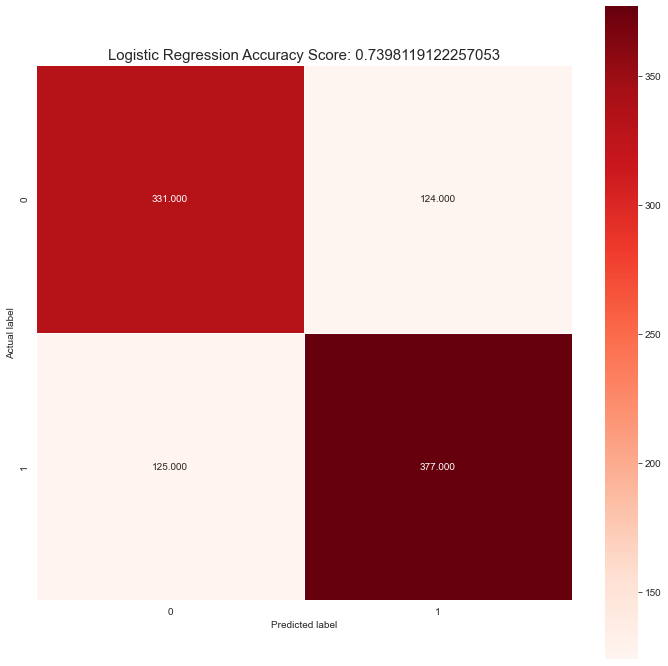

In [11]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm,annot=True, fmt=".3f", linewidths=.5, square =True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Score: {0}'. format(lr_score)
plt.title(title, size =15)